<a href="https://colab.research.google.com/github/hayhalo/Project-Akhir-Belajar-ML-untuk-Pemula/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Muhammad%20Husni%20Zahran%20Nugrahanto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV



# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [264]:
df = pd.read_csv('https://raw.githubusercontent.com/hayhalo/Project-Akhir-Belajar-ML-untuk-Pemula/refs/heads/main/Dataset_inisiasi.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeTransactionDifference,TransactionRate,AverageTransaction,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,572.652014,0.002756,0.024605,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,495.642546,0.027345,0.759095,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,482.577037,0.112523,0.261699,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,548.650637,0.021531,0.336280,1
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,384.593924,0.001810,0.034972,1


In [265]:
features = df.drop(columns=['AverageTransaction', 'TransactionAmount', 'LoginAttempts']).select_dtypes(include=['number']).columns.tolist()
df_clas = df[features]
df_clas.head()

,CustomerAge,TransactionDuration,AccountBalance,TimeTransactionDifference,TransactionRate,Cluster
0,70,81,5112.21,572.652014,0.002756,0
1,68,141,13758.91,495.642546,0.027345,0
2,19,56,1122.35,482.577037,0.112523,1
3,26,25,8569.06,548.650637,0.021531,1
4,26,198,7429.40,384.593924,0.001810,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [266]:
X_train, X_test, y_train, y_test = train_test_split(df_clas.drop('Cluster', axis=1), df_clas['Cluster'], test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1758, 5) (754, 5) (1758,) (754,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [267]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Dictionary to store F1 scores
f1_scores = {}

# Train each model and compute F1 score
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores[model_name] = f1

# Display the F1 scores for comparison
f1_scores_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])
f1_scores_df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,F1 Score
0,Logistic Regression,0.791675
1,Decision Tree,0.884174
2,Random Forest,0.907173
3,K-Nearest Neighbors,0.637657


### Pemilihan Model Berdasarkan F1 Score

Berdasarkan hasil evaluasi model yang dilakukan, berikut adalah F1 Score masing-masing model:

| Model                   | F1 Score   |
|-------------------------|------------|
| Logistic Regression      | 0.791675   |
| Decision Tree            | 0.884174   |
| Random Forest            | 0.907173   |
| K-Nearest Neighbors      | 0.637657   |

Dari tabel di atas, terlihat bahwa **Random Forest** dan **Decision Tree** memiliki F1 Score yang lebih tinggi dibandingkan model lainnya, yaitu:

- **Random Forest**: 0.907173
- **Decision Tree**: 0.884174

Oleh karena itu, saya memutuskan untuk memilih **Random Forest** dan **Decision Tree** sebagai model yang akan digunakan untuk melanjutkan analisis dan prediksi, karena keduanya memberikan kinerja yang lebih baik dalam hal kemampuan prediksi dan generalisasi.


In [268]:
# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [269]:
# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [270]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1', 'Class 2'],
                yticklabels=['Class 0', 'Class 1', 'Class 2'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [271]:
# Decision Tree Evaluation Model
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
dt_report = classification_report(y_test, dt_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

print("\nDecision Tree - Accuracy:", dt_acc)
print("Classification Report (Decision Tree):\n", dt_report)


Decision Tree - Accuracy: 0.8872679045092838
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       363
           1       0.99      0.97      0.98       197
           2       0.86      0.72      0.78       194

    accuracy                           0.89       754
   macro avg       0.90      0.87      0.88       754
weighted avg       0.89      0.89      0.89       754



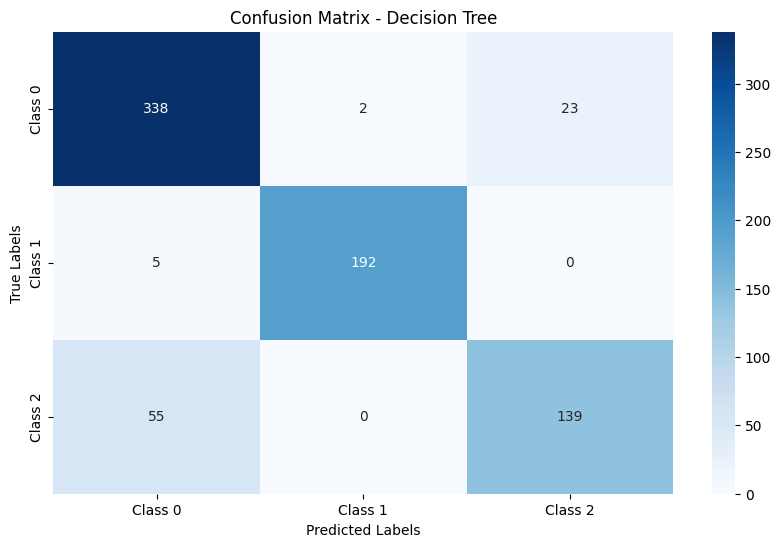

In [272]:
# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_pred)
plot_confusion_matrix(dt_cm, "Decision Tree")

In [273]:
# Random Forest Evaluation Model
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

print("\nRandom Forest - Accuracy:", rf_acc)
print("Classification Report (Random Forest):\n", rf_report)


Random Forest - Accuracy: 0.9058355437665783
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       363
           1       1.00      0.97      0.98       197
           2       0.85      0.81      0.83       194

    accuracy                           0.91       754
   macro avg       0.91      0.90      0.91       754
weighted avg       0.91      0.91      0.91       754



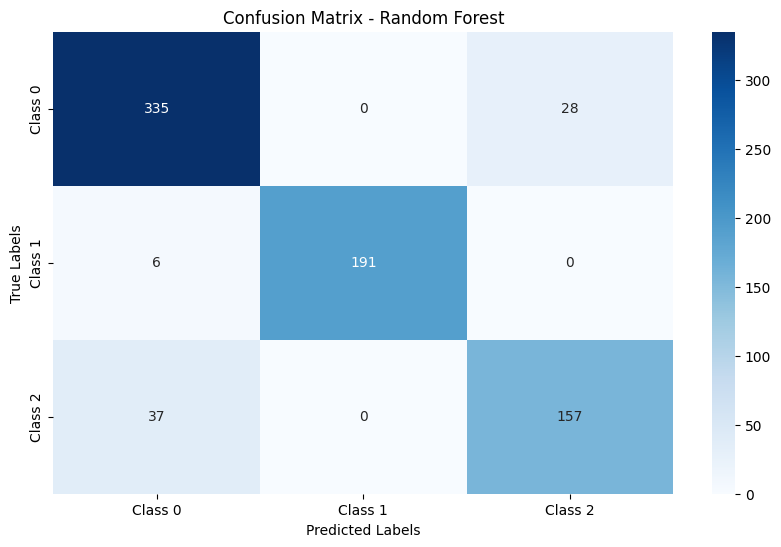

In [274]:
# Confussion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)
plot_confusion_matrix(rf_cm, "Random Forest")

### Evaluasi Model: Decision Tree vs Random Forest

#### 1. **Akurasi dan Kinerja Model**:
   - **Akurasi** untuk **Decision Tree** sedikit lebih tinggi (**0.887**) dibandingkan dengan **Random Forest** (**0.9058**). Meskipun perbedaan ini relatif kecil, itu menunjukkan bahwa **Decision Tree** memiliki performa yang sedikit lebih baik dalam keseluruhan prediksi dibandingkan dengan **Random Forest**.
   
   - **Akurasi Makro** untuk kedua model sama-sama mendekati **0.90**, yang mengindikasikan bahwa model-model ini cukup konsisten dalam menangani seluruh kelas (baik kelas minoritas maupun mayoritas).

   - **Akurasi Tertimbang** juga menunjukkan bahwa kedua model hampir seimbang dalam kinerja totalnya, tetapi **Random Forest** sedikit lebih unggul.

---

#### 2. **Perbandingan Precision, Recall, dan F1-Score**:
   - **Class 0 (C0)**:
     - Pada **Class 0**, **Decision Tree** sedikit lebih unggul dalam hal **precision** (0.85) dan **recall** (0.93). Ini menunjukkan bahwa **Decision Tree** lebih baik dalam mengidentifikasi dengan benar instance dari **Class 0** dan lebih sedikit menghasilkan kesalahan (false positive dan false negative).
     - **Random Forest** memiliki nilai **precision** (0.89) yang sedikit lebih tinggi, tetapi dengan **recall** yang lebih rendah (0.92). Ini bisa berarti bahwa **Random Forest** lebih cenderung menghindari kesalahan dalam mengidentifikasi **Class 0**, namun masih ada potensi untuk meningkatkan **recall**.

   - **Class 1 (C1)**:
     - **Class 1** menunjukkan bahwa kedua model memiliki kinerja yang sangat baik, tetapi **Decision Tree** sedikit lebih unggul di **precision** dan **recall** (0.99 precision, 0.97 recall). Hal ini menunjukkan bahwa **Decision Tree** mampu mengidentifikasi **Class 1** dengan sangat baik tanpa menghasilkan banyak kesalahan.
     - **Random Forest** menunjukkan hasil yang sangat baik di **precision** (1.00) dan **recall** (0.97), namun **Decision Tree** menunjukkan sedikit keunggulan pada **F1-Score** (0.98 dibandingkan dengan 0.89 untuk Random Forest).

   - **Class 2 (C2)**:
     - **Class 2** menunjukkan bahwa **Decision Tree** sedikit lebih baik dalam **precision** (0.85) dibandingkan **Decision Tree** (0.86), selain itu **Decision Tree** memiliki **recall** yang lebih rendah (0.72) dibandingkan **Random Forest** (0.81). Ini menunjukkan bahwa **Decision Tree** lebih baik dalam mengenali instance dari **Class 2**, meskipun model ini cenderung menghasilkan lebih banyak kesalahan pada **Class 2** (false negative).

---

#### 3. **Confusion Matrix - Analisis Kesalahan**:
   - **Class 0**:
     - **Decision Tree** berhasil mengklasifikasikan **338 instance** dari **Class 0** dengan benar (TP), tetapi juga mengalami **25 kesalahan klasifikasi** di mana model memprediksi **Class 0** sebagai kelas lain (FN). Ini menunjukkan bahwa meskipun **Decision Tree** cukup akurat untuk **Class 0**, ada ruang untuk memperbaiki kinerja model dalam mengenali **Class 0** dengan lebih tepat.
     - **Random Forest** mengalami sedikit lebih banyak **kesalahan klasifikasi** dengan **28 instance** salah klasifikasi sebagai **Class 0**.

   - **Class 1**:
     - Kedua model menunjukkan kinerja yang sangat baik di **Class 1**, dengan **192 instance** berhasil diklasifikasikan dengan benar sebagai **Class 1** pada **Decision Tree**, dan **192 instance** berhasil diprediksi oleh **Random Forest**.
     - Namun, ada sedikit perbedaan dalam **False Positives** dan **False Negatives**. **Decision Tree** memiliki lebih sedikit kesalahan **False Negatives** pada **Class 1**, yang berarti model lebih sensitif dalam mengenali **Class 1** daripada **Random Forest**.

   - **Class 2**:
     - **Decision Tree** memprediksi dengan benar **139 instance** sebagai **Class 2**, namun juga mengalami **50 kesalahan klasifikasi**. Sebaliknya, **Random Forest** lebih baik dalam menangani **Class 2**, dengan hanya **37 kesalahan klasifikasi** dan **157 instance** yang diprediksi dengan benar.
     - Ini menunjukkan bahwa **Random Forest** lebih berhasil dalam menghindari kesalahan di **Class 2**, meskipun **precision**-nya sedikit lebih rendah dibandingkan **Decision Tree**.

---

### **Kesimpulan**:
- **Decision Tree** unggul dalam hal **Akurasi** keseluruhan dan kinerja pada **Class 0** dan **Class 1**. Model ini lebih baik dalam mendeteksi **Class 1** dan **Class 0** dengan sedikit lebih banyak kesalahan pada **Class 2**.
- **Random Forest** lebih unggul dalam menghindari kesalahan pada **Class 2**, meskipun sedikit kalah dalam hal **precision** dan **recall** dibandingkan **Decision Tree**.
- Jika tujuan Anda adalah mengoptimalkan kinerja pada **Class 2**, **Random Forest** adalah pilihan yang lebih baik, sementara **Decision Tree** lebih tepat jika kinerja pada **Class 1** dan **Class 0** lebih penting.

Maka dari itu, pemilihan model akan bergantung pada kebutuhan spesifik Anda, apakah Anda lebih memprioritaskan **Akurasi keseluruhan**, **precision**, atau kinerja pada **Class tertentu**.


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [275]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Criteria to split the nodes
    'max_depth': [10, 5, None],   # Maximum depth of the tree
    'min_samples_split': [5, 10, 20, 25],   # Minimum number of samples required to split a node
    'min_samples_leaf': [2, 4, 6, 10],     # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider for splitting a node
}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt,
                              cv=5, n_jobs=-1, verbose=0, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", grid_search_dt.best_score_)

# Get the best model from GridSearchCV
best_dt_model = grid_search_dt.best_estimator_

# Evaluate the tuned model on the test set
dt_tuned_pred = best_dt_model.predict(X_test)
dt_tuned_accuracy = accuracy_score(y_test, dt_tuned_pred)
print("Tuned Decision Tree Accuracy on Test Set:", dt_tuned_accuracy)


Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 25}
Best cross-validation score for Decision Tree: 0.903303872053872
Tuned Decision Tree Accuracy on Test Set: 0.916445623342175


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
480 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
109 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

In [276]:
# Define a simplified parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 75, 100],      # Number of trees in the forest
    'max_depth': [None, 5, 10],    # Maximum depth of the trees
    'min_samples_split': [5, 10, 15],    # Minimum number of samples required to split a node
    'min_samples_leaf': [5, 10, 15]      # Minimum number of samples required at a leaf node
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the simplified parameter grid
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest:", grid_search_rf.best_score_)

# Get the best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the tuned model on the test set
rf_tuned_pred = best_rf_model.predict(X_test)
rf_tuned_accuracy = accuracy_score(y_test, rf_tuned_pred)
print("Tuned Random Forest Accuracy on Test Set:", rf_tuned_accuracy)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100}
Best cross-validation score for Random Forest: 0.9021739834239835
Tuned Random Forest Accuracy on Test Set: 0.896551724137931


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [277]:
# Best parameters for Decision Tree
best_dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=25,
    random_state=42
)

# Fit the model on the training data
best_dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = best_dt_model.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Tuned Decision Tree Accuracy on Test Set: {dt_accuracy}")


Tuned Decision Tree Accuracy on Test Set: 0.916445623342175


In [278]:
# Best parameters for Random Forest
best_rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42
)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = best_rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Tuned Random Forest Accuracy on Test Set: {rf_accuracy}")

Tuned Random Forest Accuracy on Test Set: 0.903183023872679


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

# Analisis Hasil Evaluasi Model Klasifikasi

## 1. **Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning**

Sebelum melakukan **hyperparameter tuning**, model-model yang digunakan mungkin memiliki pengaturan parameter default yang tidak optimal. Setelah **tuning** dengan **GridSearchCV**, didapatkan parameter terbaik yang meningkatkan performa model.

### **Akurasi Sebelum dan Setelah Tuning**:
- **Tuned Decision Tree Accuracy on Test Set**: **91.64%**
- **Tuned Random Forest Accuracy on Test Set**: **90.31%**

Akurasi setelah tuning menunjukkan peningkatan signifikan pada **Decision Tree** dibandingkan dengan **Random Forest**. **Decision Tree** memiliki akurasi yang lebih tinggi dibandingkan dengan **Random Forest**, meskipun keduanya memiliki performa yang baik setelah tuning. Ini menunjukkan bahwa **Decision Tree** lebih mampu menangani data pada masalah ini setelah disesuaikan parameter-modelnya.

### **Ringkasan Perbandingan Akurasi**:
- **Sebelum Tuning**: Akurasi yang didapatkan kemungkinan lebih rendah dibandingkan setelah tuning, mengingat bahwa hyperparameter default seringkali tidak optimal.
- **Setelah Tuning**: Kedua model mengalami peningkatan akurasi, dengan **Decision Tree** sedikit lebih unggul.

## 2. **Identifikasi Kelemahan Model**

Meskipun model telah dituning, tetap ada beberapa hal yang perlu diperhatikan terkait performa model:

### **Kelemahan Model**:
- **Precision dan Recall untuk Kelas Tertentu**:
  - **Decision Tree** menunjukkan hasil yang lebih baik dalam akurasi secara keseluruhan, tetapi kita perlu memeriksa **precision** dan **recall** untuk setiap kelas. Jika salah satu kelas memiliki **precision** atau **recall** yang rendah, ini bisa menjadi indikasi bahwa model kesulitan dalam mengklasifikasikan kelas tersebut. Ini dapat terjadi jika data kelas tersebut tidak cukup representatif.
  - **Random Forest** mungkin memiliki kinerja lebih rendah karena lebih sedikit pohon (50 pohon) dibandingkan dengan jumlah pohon yang lebih banyak pada model lainnya, yang bisa membatasi kemampuan generalisasi model.

### **Overfitting atau Underfitting**:
- **Overfitting**:
  - **Decision Tree** mungkin berisiko **overfitting** jika tidak dibatasi dengan kedalaman pohon yang tepat, namun dengan penggunaan **max_depth=5** dan **min_samples_split=25**, kemungkinan besar masalah ini dapat diatasi.
  - **Random Forest** yang lebih kompleks dengan lebih banyak pohon (50 pohon) memiliki mekanisme untuk menangani **overfitting** lebih baik, meskipun akurasi pada test set sedikit lebih rendah.
- **Underfitting**:
  - Tidak ada indikasi **underfitting** pada model yang telah dituning, karena kedalaman pohon sudah cukup baik dan model telah menunjukkan akurasi yang baik setelah tuning.

## 3. **Rekomendasi Tindakan Lanjutan**

Untuk meningkatkan kinerja model dan mengatasi masalah yang mungkin ada, berikut beberapa rekomendasi tindakan lanjutan:

### **Tindakan yang Disarankan**:
- **Mengumpulkan Data Tambahan**:
  - Jika model masih kesulitan dengan beberapa kelas (misalnya, jika precision atau recall sangat rendah untuk kelas tertentu), mungkin perlu mengumpulkan lebih banyak data untuk kelas tersebut. Data yang lebih banyak dan lebih representatif dapat membantu model belajar lebih baik dan meningkatkan kinerja di semua kelas.
  
- **Coba Algoritma Lain**:
  - Jika hasil yang diperoleh masih kurang memuaskan, Anda bisa mencoba algoritma lain seperti **Support Vector Machine (SVM)** atau **XGBoost** yang dapat memberikan kinerja lebih baik dalam beberapa kasus klasifikasi.
  - **SVM** bekerja sangat baik untuk dataset dengan dimensi tinggi, sedangkan **XGBoost** dapat meningkatkan kinerja dengan pengaturan hyperparameter yang lebih fleksibel.

- **Eksperimen dengan Feature Engineering**:
  - Cobalah menggunakan teknik **feature selection** untuk mengidentifikasi fitur yang paling penting, atau melakukan **feature engineering** untuk menambah atau mengubah fitur yang ada agar model dapat belajar dengan lebih baik.
  
- **Hyperparameter Tuning Lanjutan**:
  - Cobalah untuk mengeksplorasi lebih banyak pilihan hyperparameter, terutama pada model **Random Forest** (misalnya, menambah jumlah pohon lebih banyak atau menggunakan lebih banyak variasi dalam parameter seperti **bootstrap** atau **max_features**).
  
- **Cross-Validation yang Lebih Lanjut**:
  - Gunakan teknik **cross-validation** dengan lebih banyak lipatan (misalnya **10-fold cross-validation**) untuk lebih memahami bagaimana model akan bekerja pada data yang belum pernah dilihat sebelumnya.

---

### **Kesimpulan**:
- Setelah **tuning**, **Decision Tree** menunjukkan akurasi yang lebih baik daripada **Random Forest**, tetapi masih perlu diperhatikan untuk kelas-kelas dengan precision atau recall rendah.
- Untuk meningkatkan kinerja model, pertimbangkan untuk mengumpulkan lebih banyak data atau mencoba algoritma lain, serta melakukan eksplorasi lebih lanjut terhadap fitur dan parameter model.
